<a href="https://colab.research.google.com/github/palaciosalondra584-dev/Inteligencia_Artificial/blob/main/Multicapa/Clasificaci%C3%B3n_de_flor_de_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Importamos el conjunto de datos iris desde sklearn y colocamos en una variable llamada irs

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()



####Muestra las claves de iris y los imprime los cuales son: data,target, y feature_names


In [2]:
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


####Esa línea muestra la descripción del conjunto de datos Iris, es decir, una explicación sobre qué contiene, sus características y su propósito.

In [3]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

####Esta linea primero muestra los nombres de las especies de flores (por ejemplo: setosa, versicolor, virginica), despues los nuemors que representa , los valores medidos y las caracteristicas

In [4]:
iris.target_names
iris.target
iris.data
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

####Importamos la libreria pandas y creamos un data frame usando los datos de iris, asignamos nombre de las columnas y mostramos el data frame de cada una de las medidas de las flores

In [5]:
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3



####Mostramos un resumen estadístico del DataFrame: promedio, desviación estándar, valores mínimos, máximos y cuartiles de cada columna numérica.


In [6]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


####Guardamos las caracteristucas en la variable "x" y las convierte en etiquetas binarias

In [7]:
X = iris_df
y = pd.get_dummies(iris.target).values


#### Dividimos los datos de entrenamiento y prueba

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


####Imprimimos el tamaño de las filas y columnas de la prueba

In [9]:
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


####Normalizamos los datos ajustando la media a cero y la desviacion estandar en uno lo que ayuda a que los modelos aprendan mejor

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


####Creamos de red neuronal con keras para qur lo haga secuencialmente, la primera capa oculta de 64 neuronas, la segunda capa con 32 neuronas y la capa de salida con 3 neuronas ambas con activacion ReLU con una clasificacion multiple.En resumen, esta red puede aprender a clasificar las flores Iris en sus 3 especies.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####Utlizamos Adam para la tasa de aprendizaje lo que ayuda que el modelo aprenda de manera mas eficiente durante el entrenamiento

In [12]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


####Colocamos y le decimos al modelo como aprender y evaluar su desempeño

In [13]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#### Definimos que el modelo tenga 10 epocas y actualiza los pesos depues de cada muestra evaluando el rendimiento depues de cada epoca lo guardamos en history que contiene la evolucion de la perdidad y la precision durante el entrenamiento

In [14]:
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6155 - loss: 0.9294 - val_accuracy: 0.9000 - val_loss: 0.4230
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4247 - val_accuracy: 0.9333 - val_loss: 0.2580
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2665 - val_accuracy: 0.9333 - val_loss: 0.2107
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9174 - loss: 0.2416 - val_accuracy: 0.9333 - val_loss: 0.1569
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9169 - loss: 0.1877 - val_accuracy: 1.0000 - val_loss: 0.1163
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9626 - loss: 0.1427 - val_accuracy: 1.0000 - val_loss: 0.0831
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9386 - loss: 0.1644 - val_accuracy: 1.0000 - val_loss: 0.0911
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0987 - val_accuracy: 1.

####Importamos matplotlib para graficar como cambio la perdidad durante el entrenamiento.
####Usuamnos "plt" para añadir etiquetas, leyendas y titulo a la grafica y asi sea mas clara visualmente

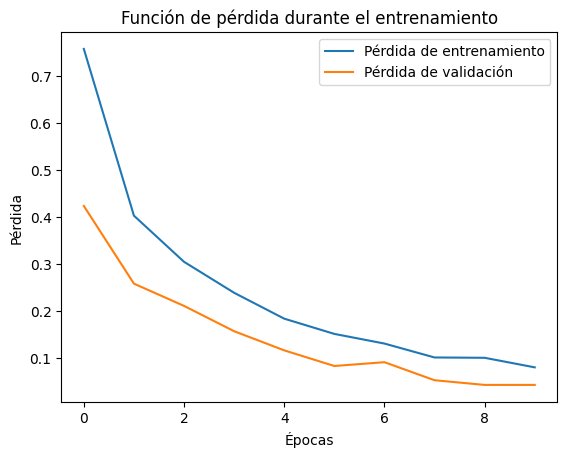

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


####Calculamos la perdida y la precision del modelo e imprimimos que tan bueno es el modelo y el porcentaje de las predicciones del conjunto prueba

In [16]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 1.0000 - loss: 0.0429
Loss: 0.042855340987443924, Accuracy: 1.0


####Comparamos las predicciones del modelo con las reales, visualizando si el desempeño de la red neuronal en cada prueba

In [18]:
import numpy as np
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


#### Analizamos el desmpeño con metricas detalladas.
#### Convirtiendonlas probabilidades a indices de clases predichas reales y calcula le sensibilidad por clase indicando cuantas fueron correctamente identificadas

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


####Visualizamos la matriz cunfusion y mostramos la sensibilidad de cada clase utilizando colores en este caso azul para ver cuantas fueron correctas e incorrectas en el modelo

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


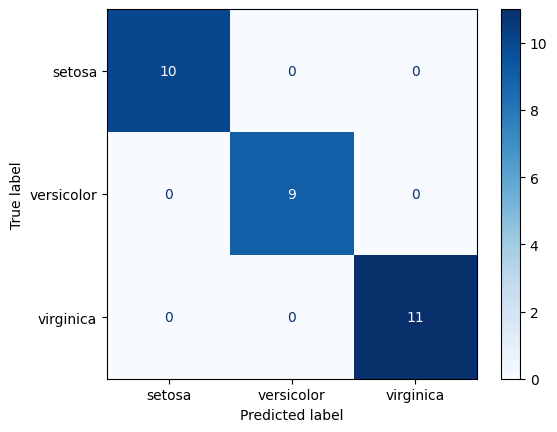

In [20]:
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')
